In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
  # The ~5% of younger individuals who did experience side effects
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # The ~5% of older individuals who did not experience side effects
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)


for i in range(1000):
  # The ~95% of younger individuals who did not experience side effects
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # The ~95% of older individuals who did experience side effects
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [4]:
print(len(train_labels))

2100


In [5]:
print(len(train_samples))

2100


In [6]:
print(train_samples[:5])

[41, 77, 35, 65, 55]


In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [9]:
print(scaled_train_samples)

[[0.36781609]
 [0.83908046]
 [0.77011494]
 ...
 [0.77011494]
 [0.63218391]
 [0.48275862]]


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential([
        Dense(units=16, input_shape=(1,), activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=2, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, shuffle=True, epochs=30, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6843 - accuracy: 0.5349 - val_loss: 0.6624 - val_accuracy: 0.6381 - 1s/epoch - 8ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6554 - accuracy: 0.6339 - val_loss: 0.6238 - val_accuracy: 0.7238 - 426ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6248 - accuracy: 0.6942 - val_loss: 0.5912 - val_accuracy: 0.7667 - 406ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5960 - accuracy: 0.7307 - val_loss: 0.5599 - val_accuracy: 0.7905 - 422ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5682 - accuracy: 0.7582 - val_loss: 0.5294 - val_accuracy: 0.8048 - 434ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5403 - accuracy: 0.7905 - val_loss: 0.5003 - val_accuracy: 0.8238 - 457ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5129 - accuracy: 0.8101 - val_loss: 0.4726 - val_accuracy: 0.8476 - 421ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4857 - accuracy: 0.8317 - val_loss: 0.4470 - val_accuracy: 0.8667 - 354ms/epoch - 2ms/step
Epo

In [21]:
test_labels = []
test_samples = []

In [22]:
for i in range(10):
  # The 5% of younger individuals who did experience side effects
  random_younger = randint(13, 64)
  test_samples.append(random_older)
  test_labels.append(1)

  # The 5% of older individuals who did not experience side effects
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)


for i in range(200):
  # The 95% of younger individuals who did not experience side effects
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # The 95% of older individuals who did experience side effects
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

In [23]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels, test_samples)

In [24]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [25]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [32]:
# for i in predictions:
#   print(i)
print(predictions[0])

[0.92249125 0.07750873]


In [29]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [30]:
print(rounded_predictions)

[0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1
 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [34]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [35]:
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

In [36]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):

  """ This function prints and plots the confusion matrix.
      Normalization can be applied by setting normalize = 'True'. """

  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix.')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[191  19]
 [  0 210]]


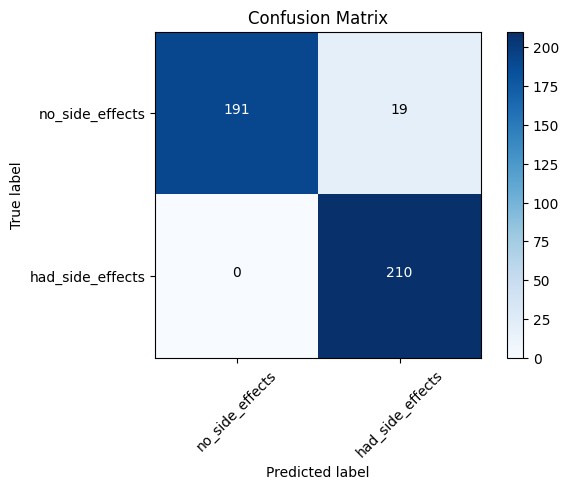

In [37]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')